In [2]:
# Import the required variables
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt, style # for ploting
import seaborn as sns

In [21]:
def warn(*args, **kwargs): pass
import warnings
warnings.warn = warn

In [46]:
def num_plot(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.histplot(x=col, data=df, ax=ax[1])
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()

In [47]:
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=14, titlepad=10)

<Figure size 432x288 with 0 Axes>

In [3]:
# Read the data
Res_Nonhydro_Capita = pd.read_excel ("../data/processed/Res_Nonhydro_Capita.xlsx", index_col = 0)
SDGs_Ranks_2021 = pd.read_excel ("../data/processed/SDGs_Ranks_2021.xlsx", index_col = 0)
SDGs_Scores_2021 = pd.read_excel ("../data/processed/SDGs_Scores_2021.xlsx", index_col = 0)

In [4]:
Res_Nonhydro_Capita_2021 = Res_Nonhydro_Capita[[2021]]
Res_Nonhydro_Capita_2021= Res_Nonhydro_Capita_2021.rename(columns={ 2021: 'Res_Nonhydro_Capita_2021'})
Res_Nonhydro_Capita_2021

,Res_Nonhydro_Capita_2021
Country,
Afghanistan,1.139890
Algeria,16.641204
Angola,7.753307
Argentina,137.997210
Armenia,5.402285
...,...
"Venezuela, RB",2.721090
Vietnam,7.216691
"Yemen, Rep",18.517979


In [8]:
# columns_SDGs_Ranks_2021 = pd.Series(SDGs_Ranks_2021.columns)
# columns_SDGs_Scores_2021 = pd.Series(SDGs_Scores_2021.columns)
# difference = columns_SDGs_Ranks_2021.compare(columns_SDGs_Scores_2021)
# print("\nDifference between the series: \n",difference)

In [5]:
SDGs_Ranks_2021 = SDGs_Ranks_2021.iloc[:,1:]
SDGs_Ranks_2021

,SDG1,SDG2,SDG3,SDG4,SDG5,SDG6,SDG7,SDG8,SDG9,SDG10,SDG11,SDG12,SDG13,SDG14,SDG15,SDG16,SDG17
Country,,,,,,,,,,,,,,,,,
Afghanistan,102,114,131,120,136,126,100,137,131,61,133,26,17,108,111,119,126
Algeria,58,94,75,65,96,97,73,101,58,14,105,38,60,95,118,63,18
Angola,132,96,130,128,104,115,114,126,130,115,124,18,32,34,71,122,112
Argentina,60,25,48,53,21,39,33,65,57,97,57,81,76,80,83,82,50
Armenia,71,68,62,67,90,76,14,84,81,73,75,35,49,110,80,28,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Venezuela, RB",131,126,92,90,69,44,38,63,86,121,122,64,78,51,52,137,68
Vietnam,63,15,83,48,45,64,82,55,62,48,63,19,44,104,129,78,72
"Yemen, Rep",116,131,121,122,137,136,104,131,127,80,127,23,26,13,127,135,99


In [6]:
SDGs_Scores_2021 = SDGs_Scores_2021.iloc[:,1:]
SDGs_Scores_2021

,SDG1,SDG2,SDG3,SDG4,SDG5,SDG6,SDG7,SDG8,SDG9,SDG10,SDG11,SDG12,SDG13,SDG14,SDG15,SDG16,SDG17
Country,,,,,,,,,,,,,,,,,
Afghanistan,63.790201,50.131000,37.098357,57.851217,23.16250,46.3138,64.822500,37.753167,6.546833,65.436978,31.761250,90.816833,99.064667,48.422883,52.9840,52.026667,43.359500
Algeria,96.939000,56.565571,75.578571,91.211000,53.71425,61.0340,86.727000,62.236167,45.405833,91.491000,57.699667,87.711833,90.150667,52.333333,51.4928,70.197700,74.101500
Angola,12.913000,55.424125,37.443571,40.775667,51.27800,53.9610,52.432667,52.485500,7.517000,25.246500,46.711750,92.220167,96.520333,66.932000,64.7534,50.653600,47.766000
Argentina,95.990000,67.543125,80.600000,95.269667,80.98550,79.0636,92.506667,70.275500,45.665000,38.402000,81.004500,76.391667,86.248667,57.281000,60.6662,65.167667,64.512750
Armenia,93.438000,60.728143,77.907214,90.329000,57.48825,68.9572,94.821333,66.279400,34.402667,55.069000,76.444750,88.684667,93.073333,48.422883,61.7920,80.024778,62.190750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Venezuela, RB",13.244000,43.225857,65.286786,82.244667,66.27800,78.1348,92.112000,70.762800,32.317333,21.608000,47.579667,81.572500,85.692000,64.511667,69.0270,34.133778,60.782000
Vietnam,95.142500,71.032625,72.467429,97.107667,72.20325,73.1380,83.200333,72.149167,43.975667,70.499500,80.116250,91.899667,93.970000,49.192167,46.6890,65.960000,59.681250
"Yemen, Rep",33.737578,40.703714,44.696429,55.689000,13.44000,38.4338,60.905000,49.294667,8.940167,48.930500,42.881500,91.545833,97.464000,77.505000,47.7480,37.058500,51.118333


# Res_Nonhydro_Capita_2021


In [33]:
Res_Nonhydro_Capita_2021

,Res_Nonhydro_Capita_2021
Country,
Afghanistan,1.139890
Algeria,16.641204
Angola,7.753307
Argentina,137.997210
Armenia,5.402285
...,...
"Venezuela, RB",2.721090
Vietnam,7.216691
"Yemen, Rep",18.517979


In [35]:
percent_missing = Res_Nonhydro_Capita_2021.isnull().sum() * 100 / len(Res_Nonhydro_Capita_2021)
print('Percentage of Missing Data', percent_missing )

Percentage of Missing Data Res_Nonhydro_Capita_2021    0.0
dtype: float64


In [36]:
Res_Nonhydro_Capita_2021.describe()

,Res_Nonhydro_Capita_2021
count,137.000000
mean,607.726471
std,1594.037931
min,0.000000
25%,6.872555
50%,99.450162
75%,610.209358
max,16486.834541


In [37]:
Res_Nonhydro_Capita_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, Afghanistan to Zimbabwe
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Res_Nonhydro_Capita_2021  137 non-null    float64
dtypes: float64(1)
memory usage: 2.1+ KB


In [16]:
# Res_Nonhydro_Capita_2021_backup = Res_Nonhydro_Capita_2021.copy()
# median = Res_Nonhydro_Capita_2021['Res_Nonhydro_Capita_2021'].median()
# Res_Nonhydro_Capita_2021['Res_Nonhydro_Capita_2021'] = Res_Nonhydro_Capita_2021.Res_Nonhydro_Capita_2021.map(lambda x: 1 if x >= median else 0)
# Res_Nonhydro_Capita_2021 = Res_Nonhydro_Capita_2021.rename(columns={'Res_Nonhydro_Capita_2021': 'Wealthy'})
# Res_Nonhydro_Capita_2021


In [17]:
# Res_Nonhydro_Capita_2021.describe()

In [136]:
#df = pd.DataFrame({'email':Res_Nonhydro_Capita_2021.index, 'list':Res_Nonhydro_Capita_2021.values})
# df = Res_Nonhydro_Capita_2021.to_frame(name = 'Wealthy')
# df.describe()

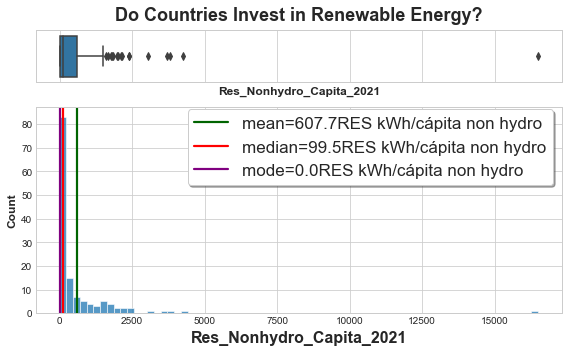

In [48]:
num_plot(Res_Nonhydro_Capita_2021, 'Res_Nonhydro_Capita_2021', 'Do Countries Invest in Renewable Energy?', 'RES kWh/cápita non hydro' ) 

### Outliers Res_Nonhydro_Capita_2021

In [22]:
(Res_Nonhydro_Capita_2021['Res_Nonhydro_Capita_2021'] > 2500).sum()


5

In [24]:
dfAux = Res_Nonhydro_Capita_2021[Res_Nonhydro_Capita_2021['Res_Nonhydro_Capita_2021']>= 2500]
dfAux.head(50)

,Res_Nonhydro_Capita_2021
Country,
Denmark,4235.348530
Finland,3696.228598
Germany,3055.064115
Iceland,16486.834541
Sweden,3811.178084


#### Los outliers son los paises Nórdicos, Alemania y Iceland

# Append target to the two datasets

In [7]:
SDGs_Ranks_2021 = pd.concat([SDGs_Ranks_2021, Res_Nonhydro_Capita_2021], axis=1)
SDGs_Ranks_2021


,SDG1,SDG2,SDG3,SDG4,SDG5,SDG6,SDG7,SDG8,SDG9,SDG10,SDG11,SDG12,SDG13,SDG14,SDG15,SDG16,SDG17,Res_Nonhydro_Capita_2021
Country,,,,,,,,,,,,,,,,,,
Afghanistan,102,114,131,120,136,126,100,137,131,61,133,26,17,108,111,119,126,1.139890
Algeria,58,94,75,65,96,97,73,101,58,14,105,38,60,95,118,63,18,16.641204
Angola,132,96,130,128,104,115,114,126,130,115,124,18,32,34,71,122,112,7.753307
Argentina,60,25,48,53,21,39,33,65,57,97,57,81,76,80,83,82,50,137.997210
Armenia,71,68,62,67,90,76,14,84,81,73,75,35,49,110,80,28,58,5.402285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Venezuela, RB",131,126,92,90,69,44,38,63,86,121,122,64,78,51,52,137,68,2.721090
Vietnam,63,15,83,48,45,64,82,55,62,48,63,19,44,104,129,78,72,7.216691
"Yemen, Rep",116,131,121,122,137,136,104,131,127,80,127,23,26,13,127,135,99,18.517979


In [8]:
SDGs_Scores_2021 = pd.concat([SDGs_Scores_2021, Res_Nonhydro_Capita_2021], axis=1)
SDGs_Scores_2021

,SDG1,SDG2,SDG3,SDG4,SDG5,SDG6,SDG7,SDG8,SDG9,SDG10,SDG11,SDG12,SDG13,SDG14,SDG15,SDG16,SDG17,Res_Nonhydro_Capita_2021
Country,,,,,,,,,,,,,,,,,,
Afghanistan,63.790201,50.131000,37.098357,57.851217,23.16250,46.3138,64.822500,37.753167,6.546833,65.436978,31.761250,90.816833,99.064667,48.422883,52.9840,52.026667,43.359500,1.139890
Algeria,96.939000,56.565571,75.578571,91.211000,53.71425,61.0340,86.727000,62.236167,45.405833,91.491000,57.699667,87.711833,90.150667,52.333333,51.4928,70.197700,74.101500,16.641204
Angola,12.913000,55.424125,37.443571,40.775667,51.27800,53.9610,52.432667,52.485500,7.517000,25.246500,46.711750,92.220167,96.520333,66.932000,64.7534,50.653600,47.766000,7.753307
Argentina,95.990000,67.543125,80.600000,95.269667,80.98550,79.0636,92.506667,70.275500,45.665000,38.402000,81.004500,76.391667,86.248667,57.281000,60.6662,65.167667,64.512750,137.997210
Armenia,93.438000,60.728143,77.907214,90.329000,57.48825,68.9572,94.821333,66.279400,34.402667,55.069000,76.444750,88.684667,93.073333,48.422883,61.7920,80.024778,62.190750,5.402285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Venezuela, RB",13.244000,43.225857,65.286786,82.244667,66.27800,78.1348,92.112000,70.762800,32.317333,21.608000,47.579667,81.572500,85.692000,64.511667,69.0270,34.133778,60.782000,2.721090
Vietnam,95.142500,71.032625,72.467429,97.107667,72.20325,73.1380,83.200333,72.149167,43.975667,70.499500,80.116250,91.899667,93.970000,49.192167,46.6890,65.960000,59.681250,7.216691
"Yemen, Rep",33.737578,40.703714,44.696429,55.689000,13.44000,38.4338,60.905000,49.294667,8.940167,48.930500,42.881500,91.545833,97.464000,77.505000,47.7480,37.058500,51.118333,18.517979


In [41]:
SDGs_Scores_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, Afghanistan to Zimbabwe
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SDG1                      137 non-null    float64
 1   SDG2                      137 non-null    float64
 2   SDG3                      137 non-null    float64
 3   SDG4                      137 non-null    float64
 4   SDG5                      137 non-null    float64
 5   SDG6                      137 non-null    float64
 6   SDG7                      137 non-null    float64
 7   SDG8                      137 non-null    float64
 8   SDG9                      137 non-null    float64
 9   SDG10                     137 non-null    float64
 10  SDG11                     137 non-null    float64
 11  SDG12                     137 non-null    float64
 12  SDG13                     137 non-null    float64
 13  SDG14                     137 non-null    float64
 14  

In [42]:
SDGs_Scores_2021.describe()

,SDG1,SDG2,SDG3,SDG4,SDG5,SDG6,SDG7,SDG8,SDG9,SDG10,SDG11,SDG12,SDG13,SDG14,SDG15,SDG16,SDG17,Res_Nonhydro_Capita_2021
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,76.933741,59.251054,71.308284,81.969209,62.731135,69.808344,74.652664,69.457345,45.694995,55.565438,73.120271,75.442102,81.434487,59.575779,65.998077,67.960566,59.813519,607.726471
std,30.047675,10.367644,19.268882,21.651808,16.976046,14.564482,25.902565,11.249896,27.633170,26.893131,17.981620,16.939322,19.123736,12.584655,13.762018,13.771513,12.168576,1594.037931
min,0.000000,24.608000,16.026071,3.733667,13.440000,32.705400,1.058500,37.753167,3.526000,0.000000,19.243000,21.236833,10.024333,22.453040,26.426500,34.133778,33.001000,0.000000
25%,59.576500,52.445250,56.384385,71.336000,51.598000,58.629800,61.385333,62.102000,24.056667,36.501007,58.692000,63.056500,72.595333,50.081000,55.689000,57.896000,50.655500,6.872555
50%,93.629500,60.464250,77.103154,89.767667,66.278000,72.011000,88.004667,69.979833,39.716167,58.437000,78.850250,80.468333,87.526000,60.304000,65.652250,68.168600,60.627500,99.450162
75%,99.465500,66.169125,85.931071,98.160708,74.949750,80.404200,92.343000,78.137333,66.500833,75.537000,86.655250,88.684667,95.896333,66.808500,76.042200,78.173000,69.600750,610.209358
max,100.000000,82.463250,96.823846,99.783333,91.371000,94.953200,99.714500,88.855500,98.784667,100.000000,100.000000,96.036000,99.802000,85.254833,97.858400,94.601800,96.698000,16486.834541


# SDGs_Ranks_2021

In [68]:
SDGs_Ranks_2021.describe()

,SDG1,SDG2,SDG3,SDG4,SDG5,SDG6,SDG7,SDG8,SDG9,SDG10,SDG11,SDG12,SDG13,SDG14,SDG15,SDG16,SDG17,Res_Nonhydro_Capita_2021
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,607.726471
std,39.692569,39.692569,39.692569,39.692569,39.692569,39.692569,39.692569,39.692569,39.692569,39.692569,39.692569,39.692569,39.692569,39.692569,39.692569,39.692569,39.692569,1594.037931
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,6.872555
50%,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,99.450162
75%,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,610.209358
max,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,16486.834541


In [69]:
SDGs_Ranks_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, Afghanistan to Zimbabwe
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SDG1                      137 non-null    int64  
 1   SDG2                      137 non-null    int64  
 2   SDG3                      137 non-null    int64  
 3   SDG4                      137 non-null    int64  
 4   SDG5                      137 non-null    int64  
 5   SDG6                      137 non-null    int64  
 6   SDG7                      137 non-null    int64  
 7   SDG8                      137 non-null    int64  
 8   SDG9                      137 non-null    int64  
 9   SDG10                     137 non-null    int64  
 10  SDG11                     137 non-null    int64  
 11  SDG12                     137 non-null    int64  
 12  SDG13                     137 non-null    int64  
 13  SDG14                     137 non-null    int64  
 14  

<Figure size 648x576 with 0 Axes>

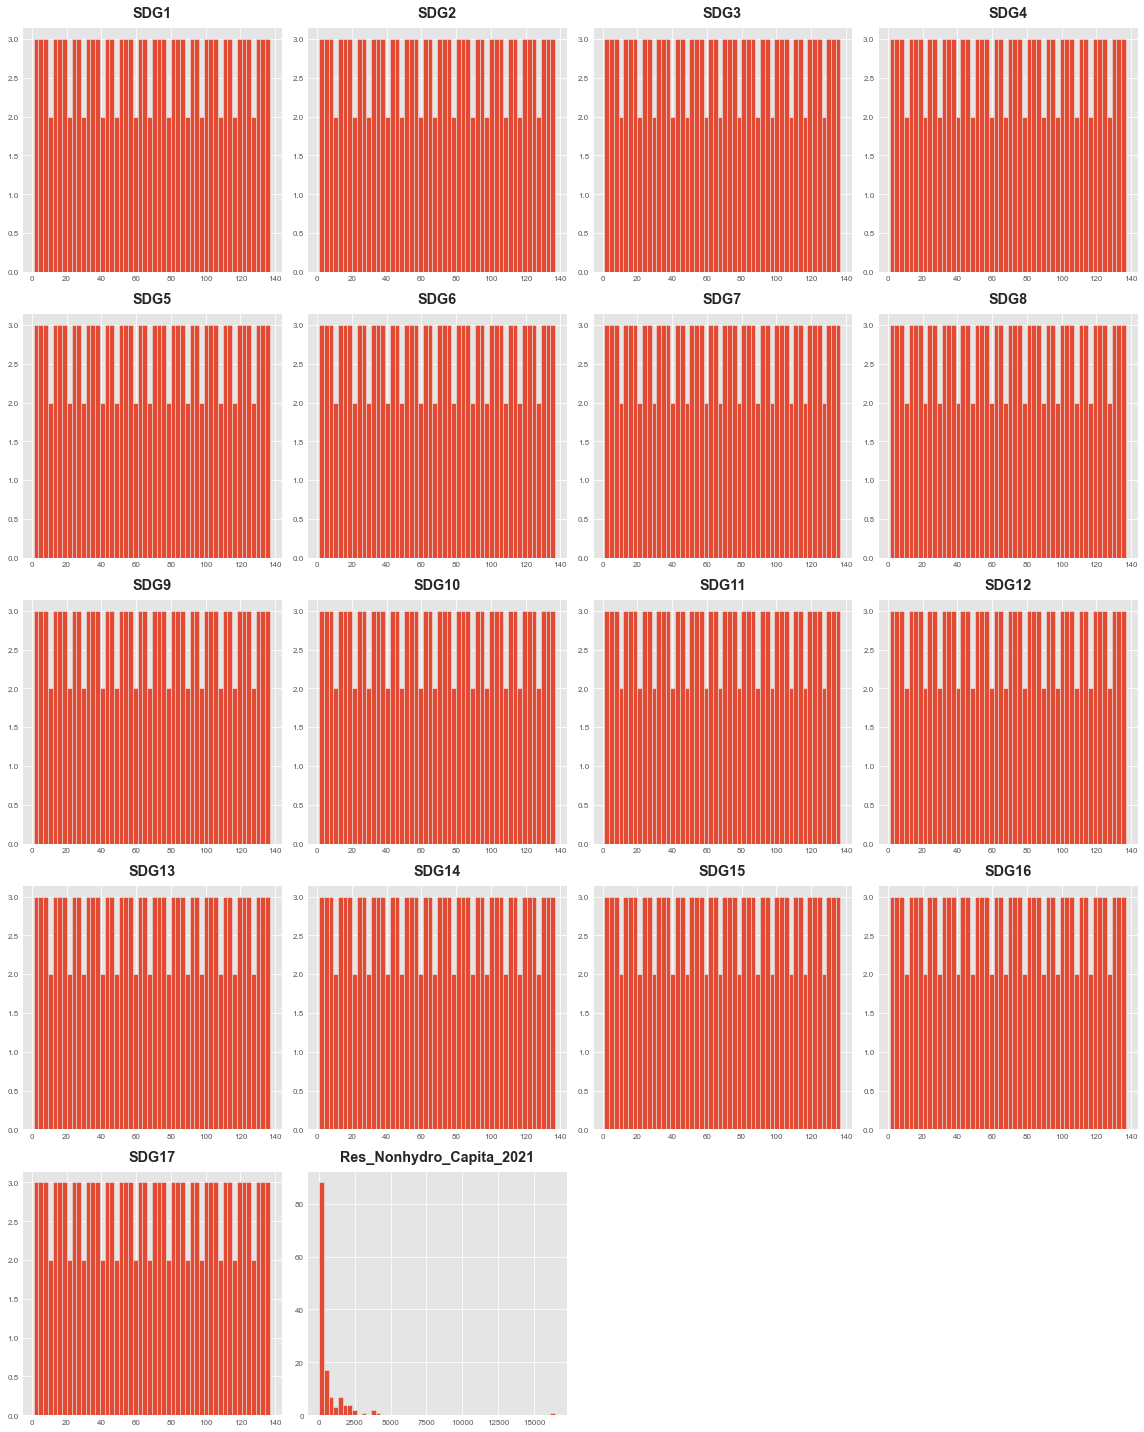

In [70]:
style.use('ggplot')

plt.figure(figsize=(9, 8))
SDGs_Ranks_2021[[   'SDG1', 
                    'SDG2', 
                    'SDG3', 
                    'SDG4', 
                    'SDG5', 
                    'SDG6', 
                    'SDG7', 
                    'SDG8', 
                    'SDG9', 
                    'SDG10', 
                    'SDG11', 
                    'SDG12', 
                    'SDG13', 
                    'SDG14', 
                    'SDG15' , 
                    'SDG16', 
                    'SDG17',
                    'Res_Nonhydro_Capita_2021']].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [72]:
# fig, axes = plt.subplots(9,2, figsize=(15,20))
# Unwealthy = SDGs_Ranks_2021[SDGs_Ranks_2021['Wealthy']==0]
# Wealthy = SDGs_Ranks_2021[SDGs_Ranks_2021['Wealthy']==1]
# axes = axes.ravel()
# for i in range(len(SDGs_Ranks_2021.columns)):
#     axes[i].hist(Unwealthy.values[:,i], bins = 40, color='r',alpha=0.4)
#     axes[i].hist(Wealthy.values[:,i],bins = 40, color='g',alpha=0.4)
#     axes[i].set_title(SDGs_Ranks_2021.columns[i])

# axes[0].legend(['Unwealthy','Wealthy']);

In [73]:
# sns.pairplot(SDGs_Ranks_2021, hue='Wealthy')

### Not so skewed, do not perform log. Res_Nonhydro_Capita_2021 potential candidate

In [74]:
# skewness > 1 highly positively skewed.
# skewness < -1 highly negatively skewed.
SDGs_Ranks_2021.skew()

SDG1                        0.000000
SDG2                        0.000000
SDG3                        0.000000
SDG4                        0.000000
SDG5                        0.000000
SDG6                        0.000000
SDG7                        0.000000
SDG8                        0.000000
SDG9                        0.000000
SDG10                       0.000000
SDG11                       0.000000
SDG12                       0.000000
SDG13                       0.000000
SDG14                       0.000000
SDG15                       0.000000
SDG16                       0.000000
SDG17                       0.000000
Res_Nonhydro_Capita_2021    7.641133
dtype: float64

# SDGs_Scores_2021

In [75]:
SDGs_Scores_2021.describe()

,SDG1,SDG2,SDG3,SDG4,SDG5,SDG6,SDG7,SDG8,SDG9,SDG10,SDG11,SDG12,SDG13,SDG14,SDG15,SDG16,SDG17,Res_Nonhydro_Capita_2021
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,76.933741,59.251054,71.308284,81.969209,62.731135,69.808344,74.652664,69.457345,45.694995,55.565438,73.120271,75.442102,81.434487,59.575779,65.998077,67.960566,59.813519,607.726471
std,30.047675,10.367644,19.268882,21.651808,16.976046,14.564482,25.902565,11.249896,27.633170,26.893131,17.981620,16.939322,19.123736,12.584655,13.762018,13.771513,12.168576,1594.037931
min,0.000000,24.608000,16.026071,3.733667,13.440000,32.705400,1.058500,37.753167,3.526000,0.000000,19.243000,21.236833,10.024333,22.453040,26.426500,34.133778,33.001000,0.000000
25%,59.576500,52.445250,56.384385,71.336000,51.598000,58.629800,61.385333,62.102000,24.056667,36.501007,58.692000,63.056500,72.595333,50.081000,55.689000,57.896000,50.655500,6.872555
50%,93.629500,60.464250,77.103154,89.767667,66.278000,72.011000,88.004667,69.979833,39.716167,58.437000,78.850250,80.468333,87.526000,60.304000,65.652250,68.168600,60.627500,99.450162
75%,99.465500,66.169125,85.931071,98.160708,74.949750,80.404200,92.343000,78.137333,66.500833,75.537000,86.655250,88.684667,95.896333,66.808500,76.042200,78.173000,69.600750,610.209358
max,100.000000,82.463250,96.823846,99.783333,91.371000,94.953200,99.714500,88.855500,98.784667,100.000000,100.000000,96.036000,99.802000,85.254833,97.858400,94.601800,96.698000,16486.834541


In [76]:
SDGs_Scores_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, Afghanistan to Zimbabwe
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SDG1                      137 non-null    float64
 1   SDG2                      137 non-null    float64
 2   SDG3                      137 non-null    float64
 3   SDG4                      137 non-null    float64
 4   SDG5                      137 non-null    float64
 5   SDG6                      137 non-null    float64
 6   SDG7                      137 non-null    float64
 7   SDG8                      137 non-null    float64
 8   SDG9                      137 non-null    float64
 9   SDG10                     137 non-null    float64
 10  SDG11                     137 non-null    float64
 11  SDG12                     137 non-null    float64
 12  SDG13                     137 non-null    float64
 13  SDG14                     137 non-null    float64
 14  

<Figure size 648x576 with 0 Axes>

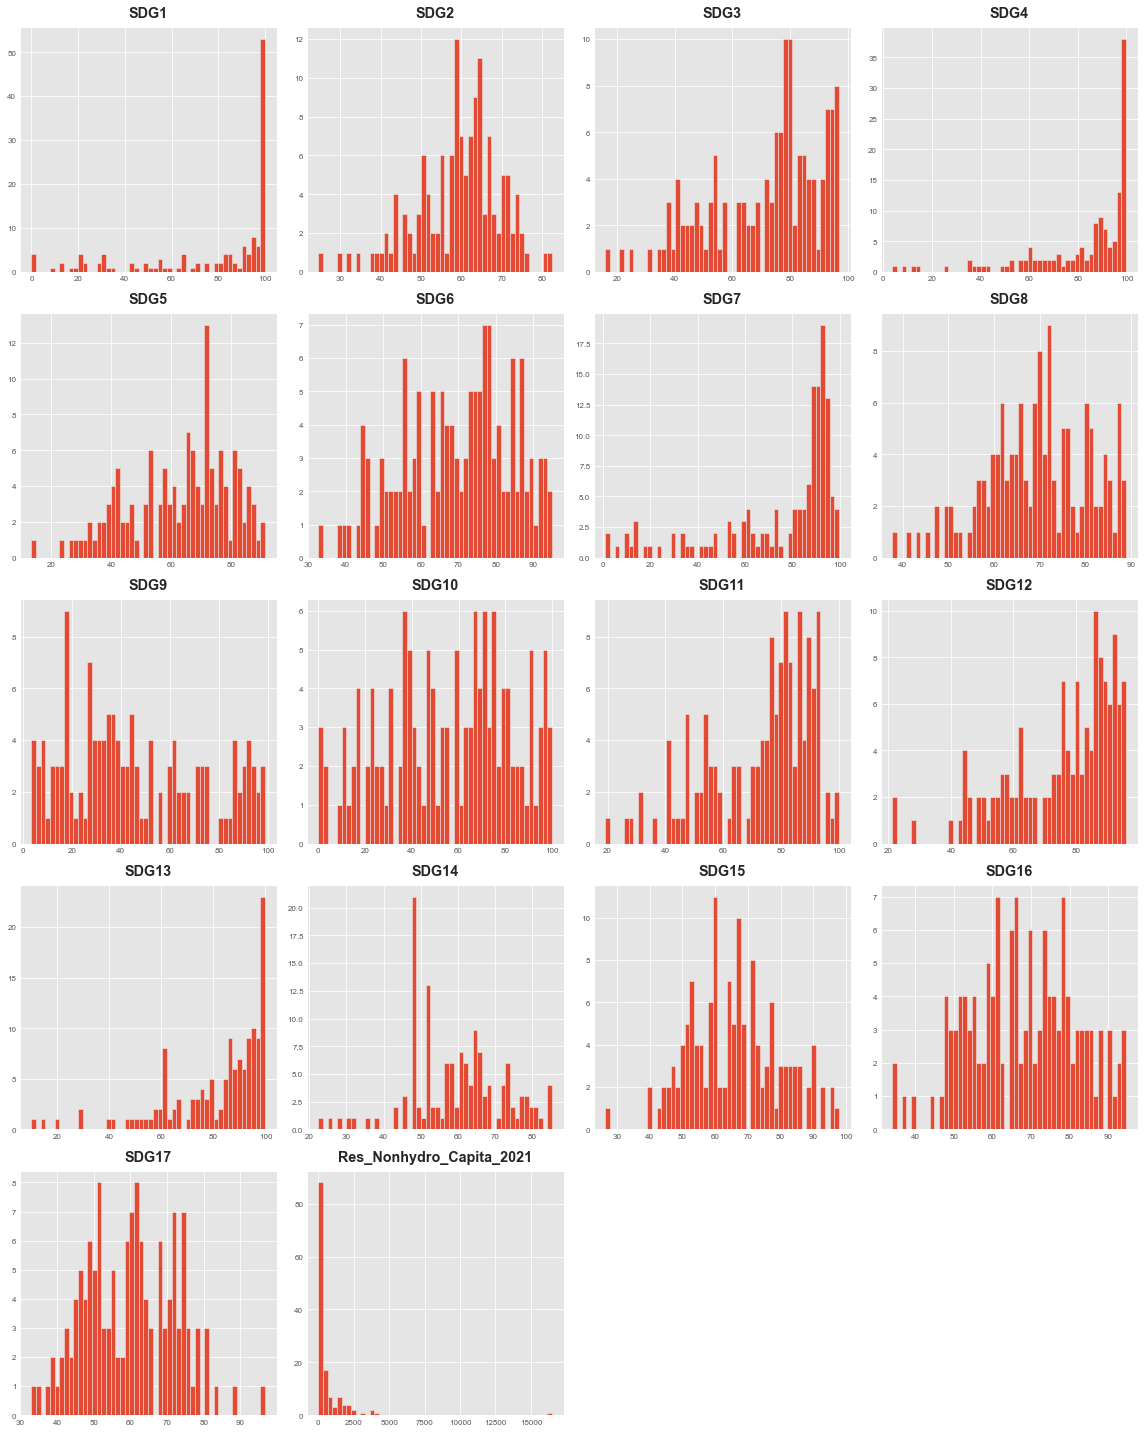

In [77]:
style.use('ggplot')

plt.figure(figsize=(9, 8))
SDGs_Scores_2021[[   'SDG1', 
                    'SDG2', 
                    'SDG3', 
                    'SDG4', 
                    'SDG5', 
                    'SDG6', 
                    'SDG7', 
                    'SDG8', 
                    'SDG9', 
                    'SDG10', 
                    'SDG11', 
                    'SDG12', 
                    'SDG13', 
                    'SDG14', 
                    'SDG15' , 
                    'SDG16', 
                    'SDG17',
                    'Res_Nonhydro_Capita_2021']].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

#### Test de Normalidad

In [78]:
from scipy.stats import shapiro
from scipy.stats import skew

my_list = SDGs_Scores_2021.columns.values.tolist() 

for column in my_list:

    var = SDGs_Scores_2021[column]
    print('Start:', column, '---')

    # Muy por debajo del nivel de significación (0.05) no se considera distribución normal.
    print("Saphiro:", shapiro(var).pvalue)
    # Para comprobar la asimetría de una variable siempre podemos calcular su valor skew
    # 0 si es simetrica, >0 cola hacia la derecha, <0 cola hacia la izquierda
    print("Asimetria:", skew(var))
    
    print('End:', column, '---\n')

Start: SDG1 ---
Saphiro: 1.3641373458345846e-13
Asimetria: -1.1818237506482785
End: SDG1 ---

Start: SDG2 ---
Saphiro: 0.0037048012018203735
Asimetria: -0.6824899824608044
End: SDG2 ---

Start: SDG3 ---
Saphiro: 1.708582090031996e-06
Asimetria: -0.7009994159277639
End: SDG3 ---

Start: SDG4 ---
Saphiro: 8.620315832680303e-13
Asimetria: -1.610804200528825
End: SDG4 ---

Start: SDG5 ---
Saphiro: 0.000560625281650573
Asimetria: -0.5214808222113269
End: SDG5 ---

Start: SDG6 ---
Saphiro: 0.008081628940999508
Asimetria: -0.32610262807431406
End: SDG6 ---

Start: SDG7 ---
Saphiro: 6.607279827430812e-13
Asimetria: -1.3773980322888673
End: SDG7 ---

Start: SDG8 ---
Saphiro: 0.03497845306992531
Asimetria: -0.33190129023691317
End: SDG8 ---

Start: SDG9 ---
Saphiro: 1.0858335372176953e-05
Asimetria: 0.39382058718630125
End: SDG9 ---

Start: SDG10 ---
Saphiro: 0.0018005907768383622
Asimetria: -0.2305710967915659
End: SDG10 ---

Start: SDG11 ---
Saphiro: 3.570600313196337e-07
Asimetria: -0.8773567

In [79]:
my_list = SDGs_Scores_2021.columns.values.tolist() 

for column in my_list:

    var = SDGs_Scores_2021[column]
    print(column, 'Values', (SDGs_Scores_2021[column] <= 0).sum())



SDG1 Values 4
SDG2 Values 0
SDG3 Values 0
SDG4 Values 0
SDG5 Values 0
SDG6 Values 0
SDG7 Values 0
SDG8 Values 0
SDG9 Values 0
SDG10 Values 2
SDG11 Values 0
SDG12 Values 0
SDG13 Values 0
SDG14 Values 0
SDG15 Values 0
SDG16 Values 0
SDG17 Values 0
Res_Nonhydro_Capita_2021 Values 5


#### En SDGs_Scores_2021 SDG1, SDG10 y Res_Nonhydro_Capita_2021 tienen ceros, le añado + 1 para ver como se comporta su transfromacion logaritmica y Cox-Box

In [81]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

dfAux = SDGs_Scores_2021.copy()

my_list = dfAux.columns.values.tolist() 
dfAux["SDG1"] = dfAux["SDG1"] + 1
dfAux["SDG10"] = dfAux["SDG10"] + 1
dfAux["Res_Nonhydro_Capita_2021"] = dfAux["Res_Nonhydro_Capita_2021"] + 1

for column in my_list:

    var = dfAux[column]

    # fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

    print('Start:', column, '---')
    
    #
    # Test de Shaphiro: Muy por debajo del nivel de significación (0.05) no se considera distribución normal.
    # Asimetria - skew: Para comprobar la asimetría de una variable siempre podemos calcular su valor skew.
    #                   0 si es simetrica, >0 cola hacia la derecha, <0 cola hacia la izquierda
    #

    # Original target
    print("p-value Shapiro test Original: ", shapiro(var).pvalue)
    # sns.distplot(var, kde=False, ax=axes[0])
    # axes[0].set_title("Original target")
    print("Asimetria:", skew(var))

    # Logaritmic
    print("p-value Shapiro test Logaritmic: ", shapiro(np.log(var),).pvalue)
    # sns.distplot(np.log(var),kde=False, ax=axes[1])
    # axes[1].set_title("Log" + 'np-value Shapiro ' +"shapiro_test")
    print("Asimetria:", skew(np.log(var)))

    # Box-cox
    print("p-value Shapiro test Box-cox: ", shapiro(stats.boxcox(var)[0]).pvalue)
    # sns.distplot(stats.boxcox(var)[0],kde=False, ax=axes[2])
    # axes[2].set_title("Box-Cox");
    print("Asimetria:", skew(stats.boxcox(var)[0]))

    print('End:', column, '---\n')

Start: SDG1 ---
p-value Shapiro test Original:  1.3641277235403038e-13
Asimetria: -1.1818237506482785
p-value Shapiro test Logaritmic:  1.0734374507888925e-18
Asimetria: -3.25779124102242
p-value Shapiro test Box-cox:  6.537437691883641e-13
Asimetria: -0.8862624968147047
End: SDG1 ---

Start: SDG2 ---
p-value Shapiro test Original:  0.0037048012018203735
Asimetria: -0.6824899824608044
p-value Shapiro test Logaritmic:  5.9584003508916794e-08
Asimetria: -1.4237337433055777
p-value Shapiro test Box-cox:  0.8181213736534119
Asimetria: -0.037461324355072996
End: SDG2 ---

Start: SDG3 ---
p-value Shapiro test Original:  1.708582090031996e-06
Asimetria: -0.7009994159277639
p-value Shapiro test Logaritmic:  1.8836912585307175e-10
Asimetria: -1.4955445555941187
p-value Shapiro test Box-cox:  5.902870179852471e-05
Asimetria: -0.2739969558612691
End: SDG3 ---

Start: SDG4 ---
p-value Shapiro test Original:  8.620315832680303e-13
Asimetria: -1.610804200528825
p-value Shapiro test Logaritmic:  2.60

#### Las unicas distribuciones normales son SDG15, SDG16 y SDG17
#### La variable Res_Nonhydro_Capita_2021 posiblemente transformarla a logaritmica

In [82]:
# fig, axes = plt.subplots(9,2, figsize=(15,20))
# Unwealthy = SDGs_Scores_2021[SDGs_Scores_2021['Wealthy']==0]
# Wealthy = SDGs_Scores_2021[SDGs_Scores_2021['Wealthy']==1]
# axes = axes.ravel()
# for i in range(len(SDGs_Scores_2021.columns)):
#     axes[i].hist(Unwealthy.values[:,i], bins = 40, color='r',alpha=0.4)
#     axes[i].hist(Wealthy.values[:,i],bins = 40, color='g',alpha=0.4)
#     axes[i].set_title(SDGs_Scores_2021.columns[i])

# axes[0].legend(['Unwealthy','Wealthy']);

In [83]:
# sns.pairplot(SDGs_Scores_2021, hue='Wealthy')

#### Not so skewed, do not perform log
#### La variable Res_Nonhydro_Capita_2021 posiblemente transformarla a logaritmica

In [84]:
# skewness > 1 highly positively skewed.
# skewness < -1 highly negatively skewed.
SDGs_Scores_2021.skew()

SDG1                       -1.194947
SDG2                       -0.690069
SDG3                       -0.708784
SDG4                       -1.628691
SDG5                       -0.527272
SDG6                       -0.329724
SDG7                       -1.392693
SDG8                       -0.335587
SDG9                        0.398194
SDG10                      -0.233131
SDG11                      -0.887099
SDG12                      -1.002256
SDG13                      -1.503762
SDG14                      -0.209898
SDG15                       0.155067
SDG16                      -0.119865
SDG17                       0.160987
Res_Nonhydro_Capita_2021    7.641133
dtype: float64

# Correlation Tables

<AxesSubplot:>

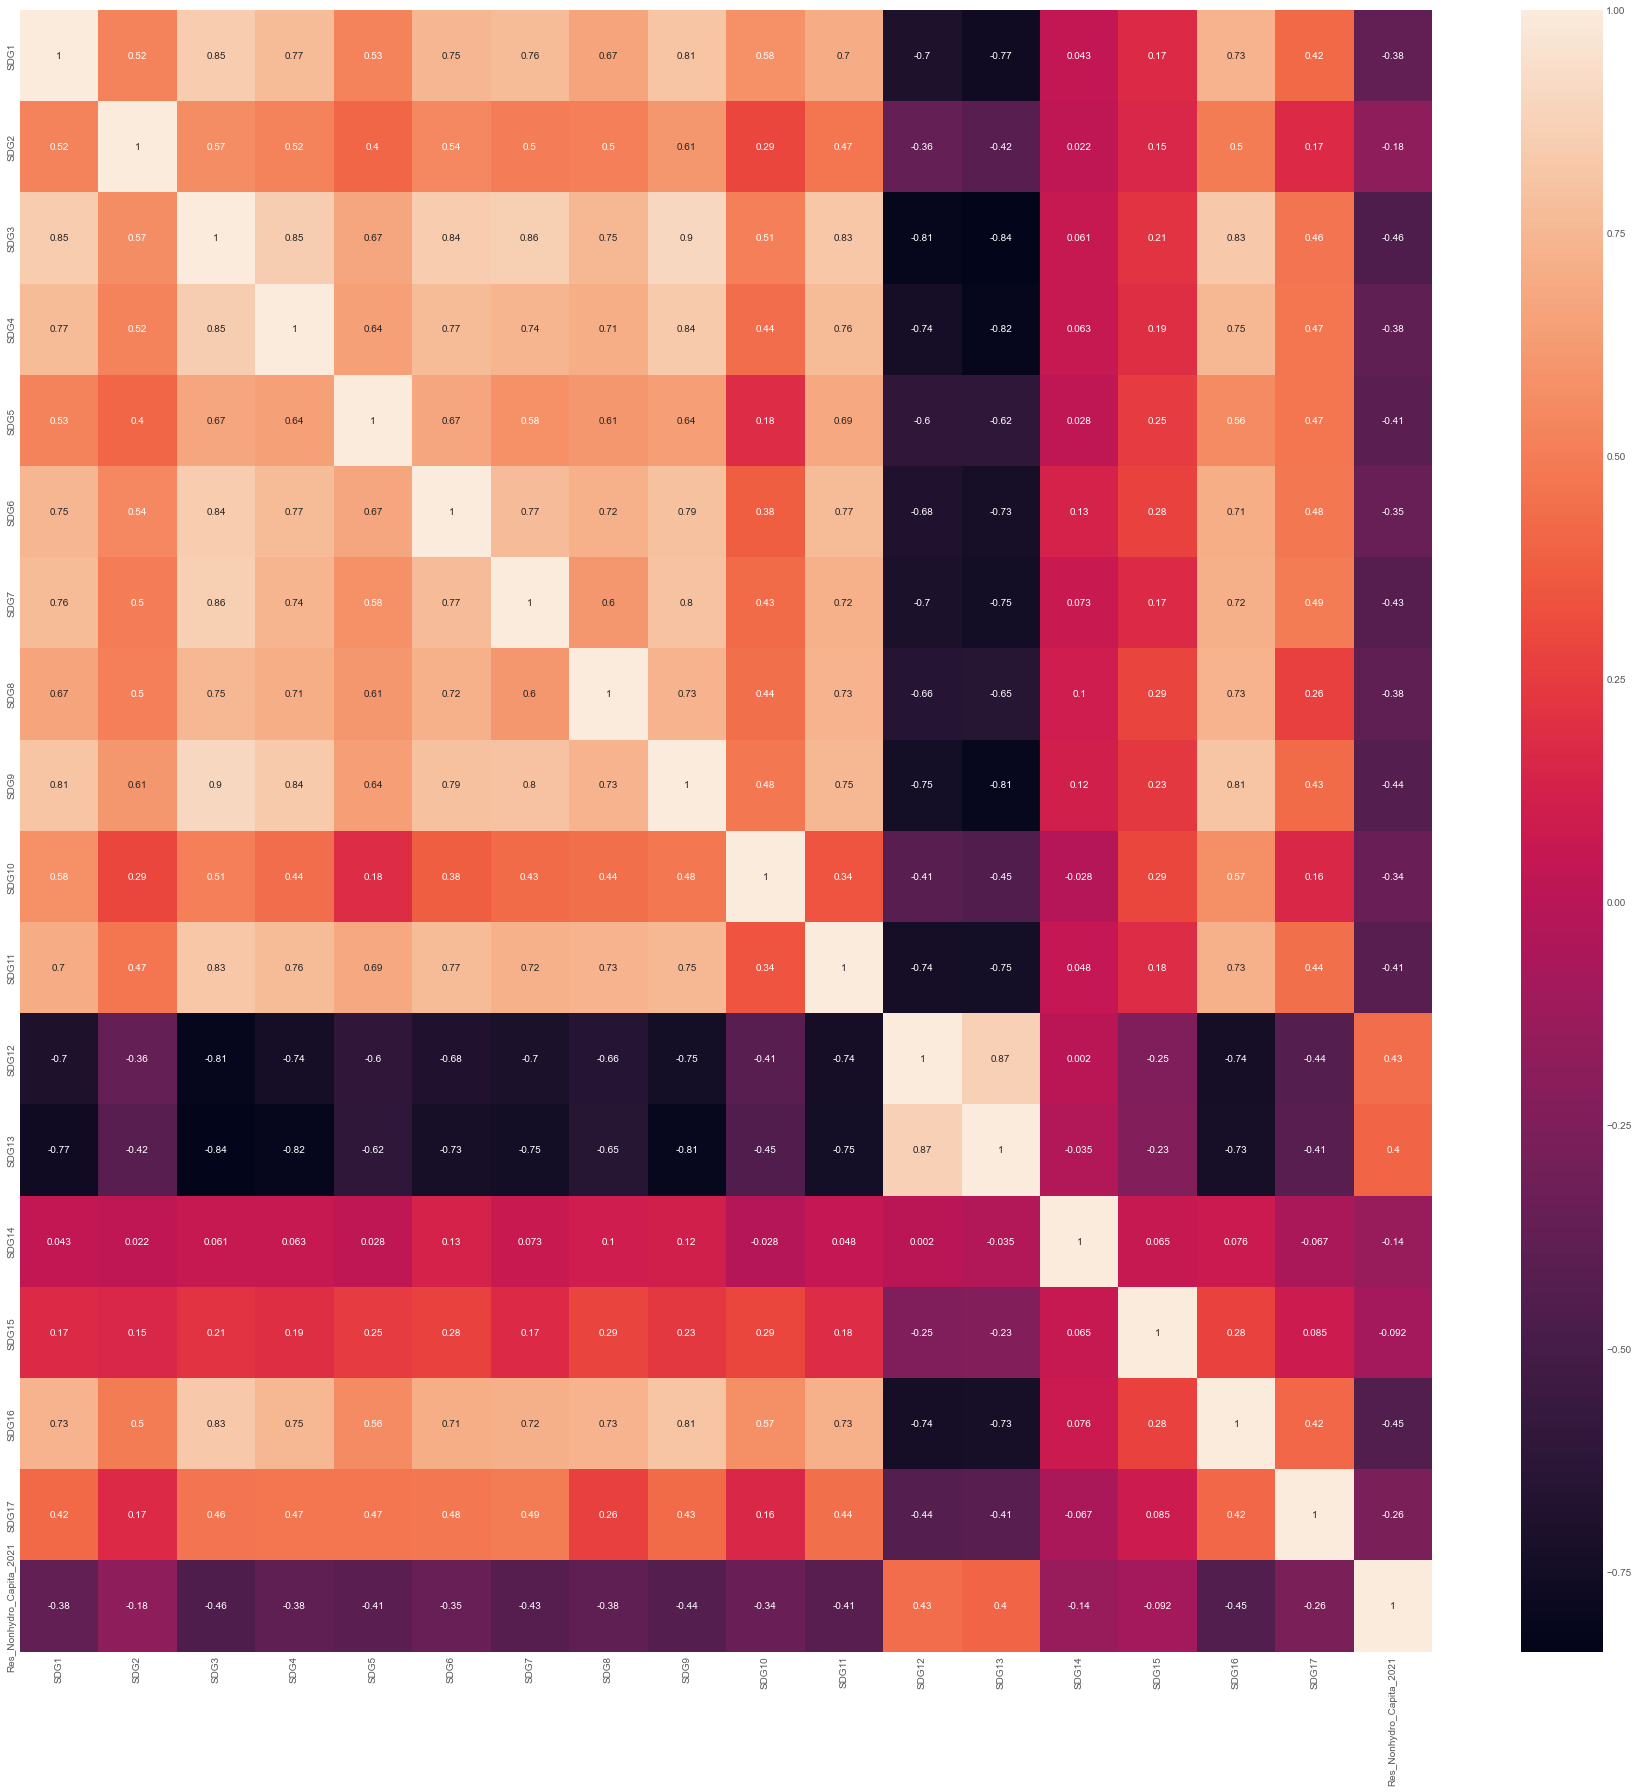

In [85]:
plt.figure(figsize=(25,25))
sns.heatmap(SDGs_Ranks_2021.corr(), annot=True)

<AxesSubplot:>

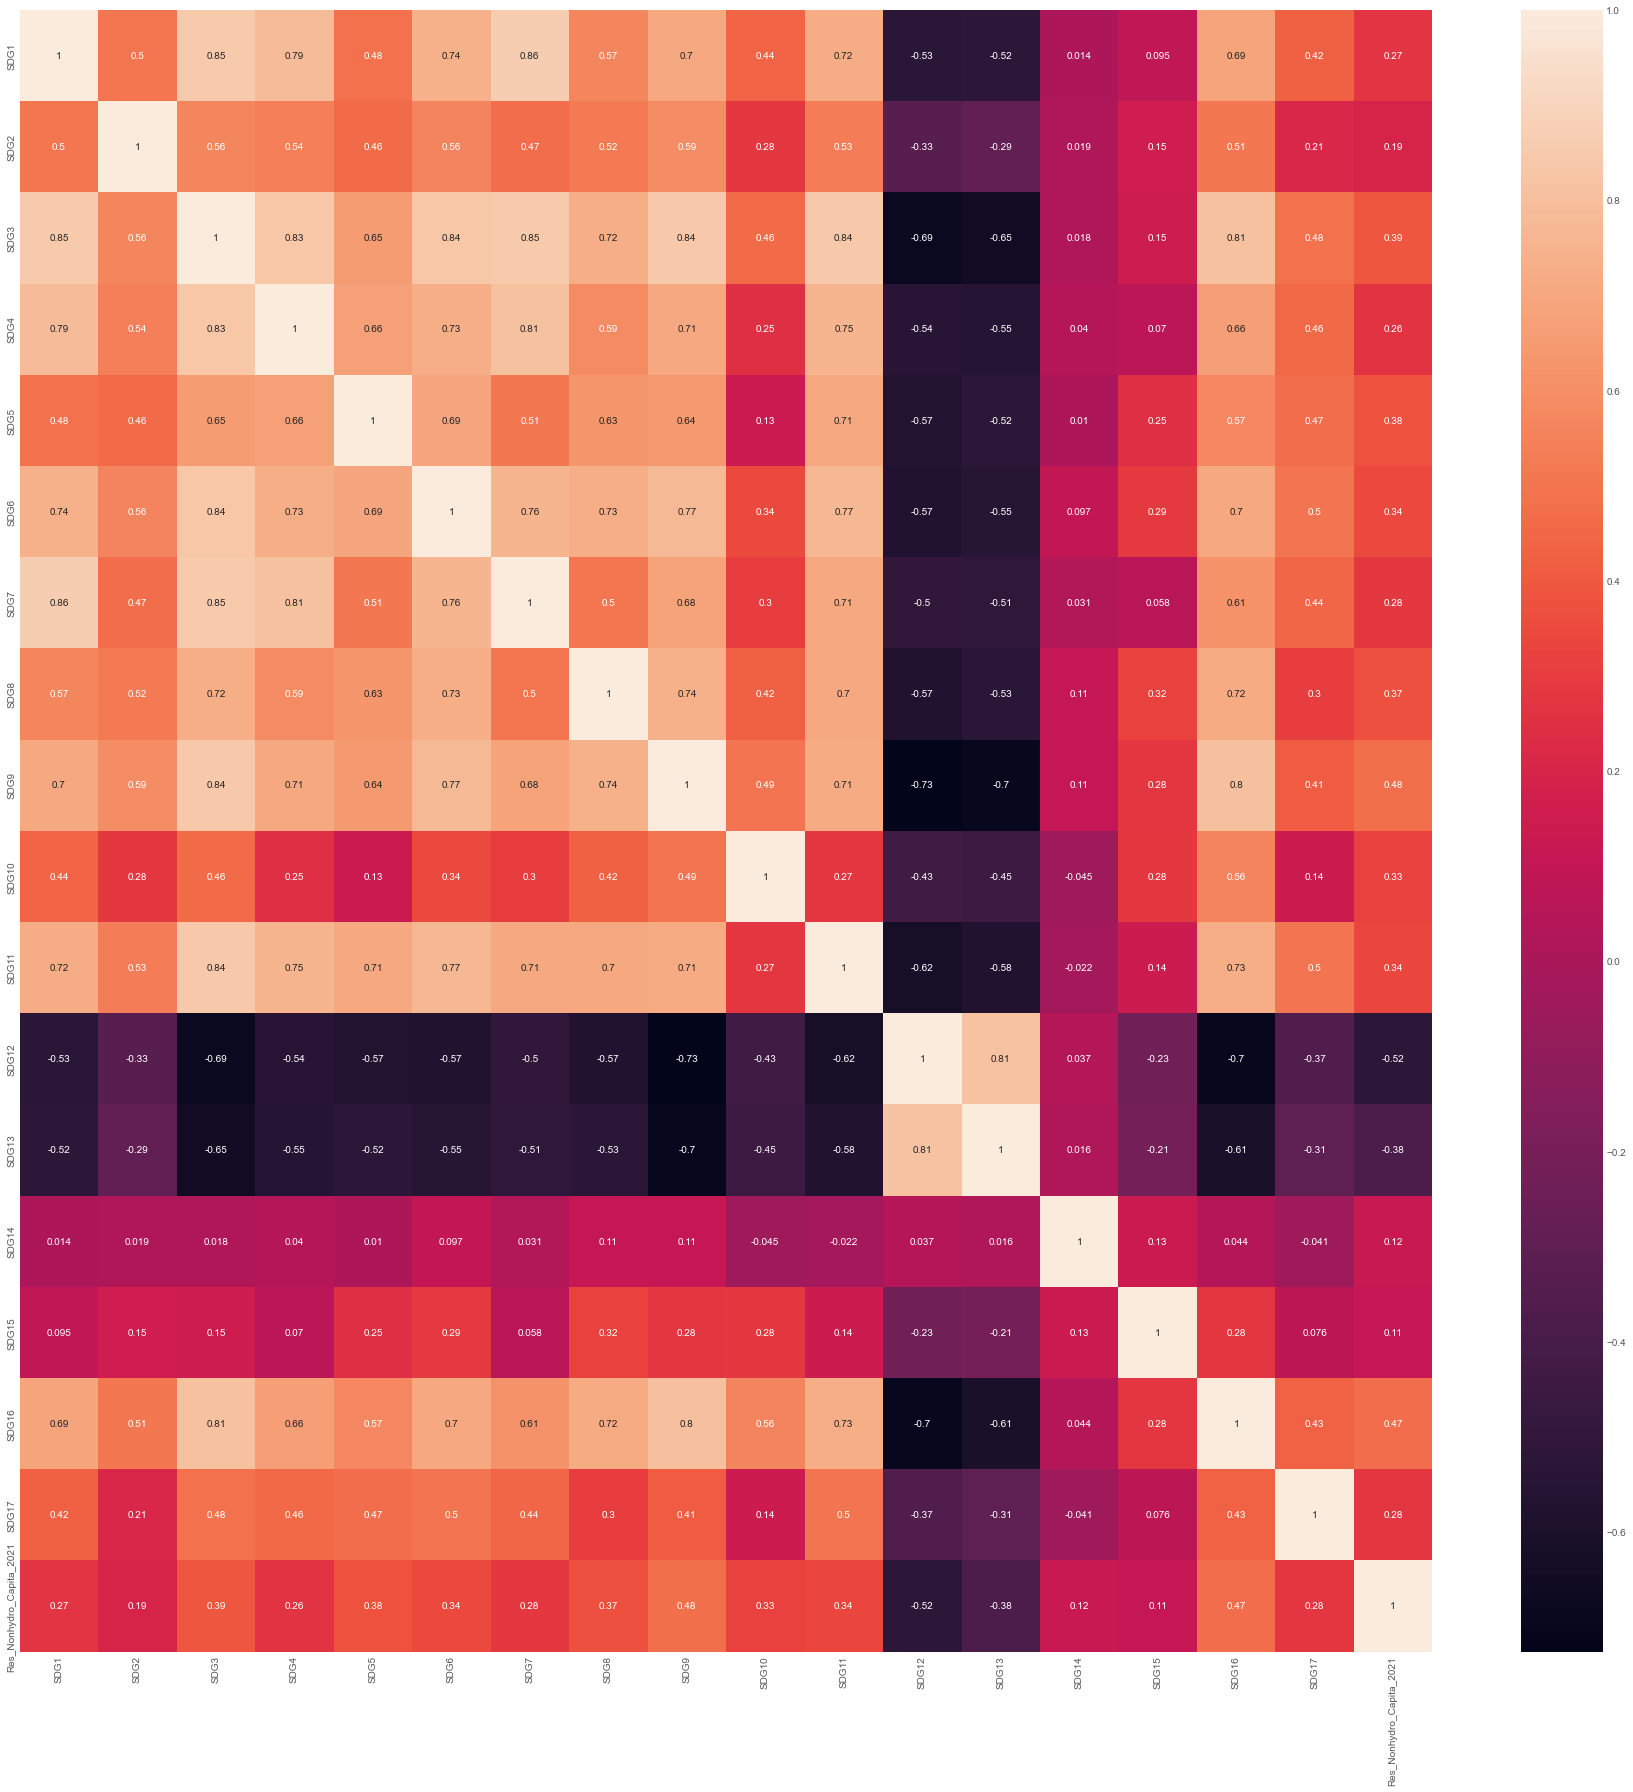

In [86]:
plt.figure(figsize=(25,25))
sns.heatmap(SDGs_Scores_2021.corr(), annot=True)

In [88]:
df = SDGs_Scores_2021.copy()

# Borra las columnas con una correlacion menor a 0.2
corr = np.abs(df.corr()['Res_Nonhydro_Capita_2021']).sort_values(ascending=True)
print(corr)

bad_corr_feat = corr[corr <0.2].index.values
print(bad_corr_feat)

#f.drop(columns = bad_corr_feat, inplace = True)


SDG15                       0.108377
SDG14                       0.123752
SDG2                        0.192792
SDG4                        0.264006
SDG1                        0.269729
SDG17                       0.277198
SDG7                        0.280463
SDG10                       0.325662
SDG11                       0.337664
SDG6                        0.341092
SDG8                        0.372279
SDG13                       0.378205
SDG5                        0.378728
SDG3                        0.392552
SDG16                       0.467389
SDG9                        0.479922
SDG12                       0.518988
Res_Nonhydro_Capita_2021    1.000000
Name: Res_Nonhydro_Capita_2021, dtype: float64
['SDG15' 'SDG14' 'SDG2']


Tienen una correlacion < 0.2 con Res_Nonhydro_Capita
* SDG15
* SDG14
* SDG2

Los que mas correlacion tinen con Res_Nonhydro_Capita son:
* SDG12 = 0.51
* SDG9 = 0.47
* SDG16 = 0.46

# Predicciones - Modelo Lineal SDGs_Scores_2021

In [158]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = SDGs_Scores_2021.drop('Res_Nonhydro_Capita_2021',1)
y = SDGs_Scores_2021['Res_Nonhydro_Capita_2021']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = std_scale.transform(X_train)
X_test_scaled = std_scale.transform(X_test)

lm_scal = LinearRegression()
lm_scal.fit(X_train_scaled, y_train)

predictions = lm_scal.predict(X_test_scaled)

print('Score:', lm_scal.score(X_test_scaled, y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('RMSE / y.mean():', np.sqrt(metrics.mean_squared_error(y_test, predictions))/y.mean())


Score: 0.5429065096845054
MAE: 440.05488562947573
MAPE:  3.1867370410633004e+16
MSE: 324443.07851779554
RMSE: 569.5990506644087
RMSE / y.mean(): 0.9372622019869554


**Feature importance**

In [142]:
intercept_scal = lm_scal.intercept_
features_std = pd.DataFrame(lm_scal.coef_, X_train.columns, columns=['coefficient'])

features_std.sort_values('coefficient', ascending=False)

,coefficient
SDG7,508.349619
SDG5,386.327919
SDG13,382.634200
SDG9,367.932884
SDG10,298.261459
SDG16,250.983321
SDG14,248.165160
SDG17,119.278697
SDG8,90.329353
SDG2,-75.258052


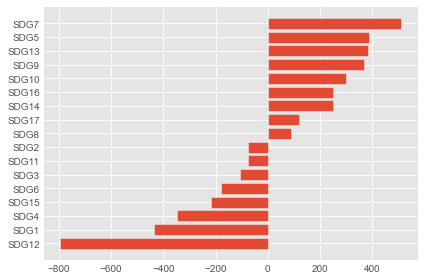

In [143]:
import matplotlib.pyplot as plt
features_std = features_std.sort_values('coefficient', ascending=True)
plt.barh(features_std.index, features_std.coefficient);

**Interpreting the coefficients:**

- Holding all other features fixed, a 1 unit increase in **SDG12** is associated with an **decrease of 794 kWh/cápita generación no hidroeléctrica renovable**. **SDG12**: Producción y consumo responsable.
- Holding all other features fixed, a 1 unit increase in **SDG7** is associated with an **increase of 508 kWh/cápita generación no hidroeléctrica renovable**. **SDG7**: Energía asequible y no Contaminante.
- Holding all other features fixed, a 1 unit increase in **SDG1** is associated with an **decrease of 437 kWh/cápita generación no hidroeléctrica renovable**. **SDG1**: Fin de la Pobreza.
- Holding all other features fixed, a 1 unit increase in **SDG5** is associated with an **increase of 386 kWh/cápita generación no hidroeléctrica renovable**. **SDG5**: Igualdad de Género.

#### Predictions from our Model

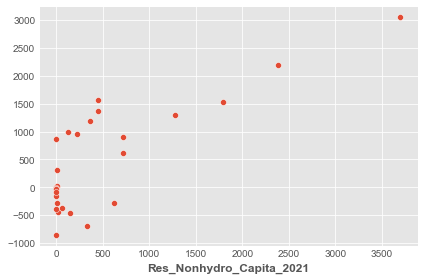

In [145]:
sns.scatterplot(y_test, predictions);

**Ploting a histogram of the residuals and making sure it looks normally distributed.** If not, linear regression is nos appropiate for this analysis. Normally distribution of residuals is an assumption for Linear Regression.

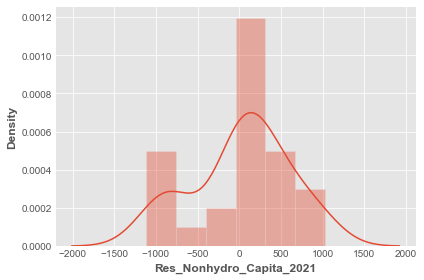

In [146]:
# Residual Histrogram
sns.distplot((y_test - predictions));

## Removing noise
Let's try a new model without:
* SDG15
* SDG14
* SDG2

In [157]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = SDGs_Scores_2021[['SDG1', 
                    'SDG3', 
                    'SDG4', 
                    'SDG5', 
                    'SDG6', 
                    'SDG7', 
                    'SDG8', 
                    'SDG9', 
                    'SDG10', 
                    'SDG11', 
                    'SDG12', 
                    'SDG13', 
                    'SDG16', 
                    'SDG17']]

y = SDGs_Scores_2021['Res_Nonhydro_Capita_2021']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = std_scale.transform(X_train)
X_test_scaled = std_scale.transform(X_test)

lm_scal = LinearRegression()
lm_scal.fit(X_train_scaled, y_train)

predictions = lm_scal.predict(X_test_scaled)

print('Score Test:', lm_scal.score(X_test_scaled, y_test))
print('MAE Test:', metrics.mean_absolute_error(y_test, predictions))
print("MAPE Test: ", metrics.mean_absolute_percentage_error(y_test,predictions))
print('MSE Test:', metrics.mean_squared_error(y_test, predictions))
print('RMSE Test:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('RMSE / y.mean() Test:', np.sqrt(metrics.mean_squared_error(y_test, predictions))/y.mean())
print('R2 score test', r2_score(y_test, predictions))


Score Test: 0.4307823986842443
MAE Test: 508.6186888328753
MAPE Test:  2.1412157890859376e+17
MSE Test: 404028.3111228082
RMSE Test: 635.6322137233199
RMSE / y.mean() Test: 1.045918260561082
R2 score test 0.4307823986842443


Ha empeorado el Score:
* Con todas las vars independientes: 0.5429065096845054
* Eliminando las vars independientes SDG15, SDG14 y SDG2: 0.4307823986842443

**Feature Importance**

In [ ]:
intercept_scal = lm_scal.intercept_
features_std = pd.DataFrame(lm_scal.coef_, X_train.columns, columns=['coefficient'])

features_std.sort_values('coefficient', ascending=False)

# Predicciones - Modelo Polinómico SDGs_Scores_2021

De Grado 2

In [155]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

X = SDGs_Scores_2021.drop('Res_Nonhydro_Capita_2021',1)
y = SDGs_Scores_2021['Res_Nonhydro_Capita_2021']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = std_scale.transform(X_train)
X_test_scaled = std_scale.transform(X_test)

poly_reg = PolynomialFeatures(degree=2) # Grado 2
poly_reg.fit(X_train_scaled)
X_poly_train = poly_reg.transform(X_train_scaled) 

pol_reg = LinearRegression()
pol_reg.fit(X_poly_train, y_train)

# print('MAE train', mean_absolute_error(y_train, pol_reg.predict(X_poly_train)))
# print('MAPE train', mean_absolute_percentage_error(y_train, pol_reg.predict(X_poly_train)))
# print('MSE train', mean_squared_error(y_train, pol_reg.predict(X_poly_train)))
# print('RMSE train', np.sqrt(mean_squared_error(y_train, pol_reg.predict(X_poly_train))))
# print('R2 score train', r2_score(y_train, pol_reg.predict(X_poly_train)))

# print('-'*20)

X_poly_test = poly_reg.transform(X_test_scaled)

print('Score Test:', lm_scal.score(X_test_scaled, y_test))
print('MAE test', mean_absolute_error(y_test, pol_reg.predict(X_poly_test)))
print('MAPE test', mean_absolute_percentage_error(y_test, pol_reg.predict(X_poly_test)))
print('MSE test', mean_squared_error(y_test, pol_reg.predict(X_poly_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, pol_reg.predict(X_poly_test))))
print('R2 score test', r2_score(y_test, pol_reg.predict(X_poly_test)))

Score Test: -3.3493415294363595
MAE test 1318.5112694323927
MAPE test 6.28806019177126e+17
MSE test 2873961.4549855394
RMSE test 1695.2762179024219
R2 score test -3.0489970644249187


De grado 3

In [156]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

X = SDGs_Scores_2021.drop('Res_Nonhydro_Capita_2021',1)
y = SDGs_Scores_2021['Res_Nonhydro_Capita_2021']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = std_scale.transform(X_train)
X_test_scaled = std_scale.transform(X_test)

poly_reg = PolynomialFeatures(degree=3) # Grado 3
poly_reg.fit(X_train_scaled)
X_poly_train = poly_reg.transform(X_train_scaled) 

pol_reg = LinearRegression()
pol_reg.fit(X_poly_train, y_train)

# print('MAE train', mean_absolute_error(y_train, pol_reg.predict(X_poly_train)))
# print('MAPE train', mean_absolute_percentage_error(y_train, pol_reg.predict(X_poly_train)))
# print('MSE train', mean_squared_error(y_train, pol_reg.predict(X_poly_train)))
# print('RMSE train', np.sqrt(mean_squared_error(y_train, pol_reg.predict(X_poly_train))))
# print('R2 score train', r2_score(y_train, pol_reg.predict(X_poly_train)))

# print('-'*20)

X_poly_test = poly_reg.transform(X_test_scaled)

print('Score Test:', lm_scal.score(X_test_scaled, y_test))
print('MAE test', mean_absolute_error(y_test, pol_reg.predict(X_poly_test)))
print('MAPE test', mean_absolute_percentage_error(y_test, pol_reg.predict(X_poly_test)))
print('MSE test', mean_squared_error(y_test, pol_reg.predict(X_poly_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, pol_reg.predict(X_poly_test))))
print('R2 score test', r2_score(y_test, pol_reg.predict(X_poly_test)))

Score Test: -3.3493415294363595
MAE test 778.9843464254784
MAPE test 1.2582851422754726e+18
MSE test 1534890.126534443
RMSE test 1238.906827220854
R2 score test -1.1624387500993891


#### Los Modelos Polinomicos de Grado 2 y 3 son peores que el Modelo Lines

# Predicciones - Modelo Lineal SDGs_Ranks_2021

In [154]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = SDGs_Ranks_2021.drop('Res_Nonhydro_Capita_2021',1)
y = SDGs_Ranks_2021['Res_Nonhydro_Capita_2021']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = std_scale.transform(X_train)
X_test_scaled = std_scale.transform(X_test)

lm_scal = LinearRegression()
lm_scal.fit(X_train_scaled, y_train)

predictions = lm_scal.predict(X_test_scaled)

print('Score Test:', lm_scal.score(X_test_scaled, y_test))
print('MAE Test:', metrics.mean_absolute_error(y_test, predictions))
print("MAPE Test: ", metrics.mean_absolute_percentage_error(y_test,predictions))
print('MSE Test:', metrics.mean_squared_error(y_test, predictions))
print('RMSE Test:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('RMSE / y.mean() Test:', np.sqrt(metrics.mean_squared_error(y_test, predictions))/y.mean())
print('R2 score test', r2_score(y_test, predictions))



Score Test: 0.1705246804703896
MAE Test: 613.4095304022451
MAPE Test:  3.3964621663169946e+17
MSE Test: 588758.168568467
RMSE Test: 767.3057855695257
RMSE / y.mean() Test: 1.2625841095439898
R2 score test 0.1705246804703896


Ha empeorado el Score:
* SDGs_Scores_2021 con todas las vars independientes: 0.5429065096845054
* SDGs_Ranks_2021 con todas las vars independientes: 0.1705246804703896

# CONCLUSIÓN

# El mejor Modelo es el Lineal SDGs_Scores_2021

Score Train: 0.37595280394585706
MAE Train: 649.9260546909705
MAPE Train:  2.9981805926090212e+16
MSE Train: 1861399.180946324
RMSE Train: 1364.331037888651
RMSE / y.mean() Train: 2.244975498675927
--------------------
Score Test: 0.5429065096845054
MAE Test: 440.05488562947573
MAPE Test:  3.1867370410633004e+16
MSE Test: 324443.07851779554
RMSE Test: 569.5990506644087
RMSE / y.mean() Test: 0.9372622019869554
--------------------
Feature Importance


,importances
features,
SDG7,508.349619
SDG5,386.327919
SDG13,382.634200
SDG9,367.932884
SDG10,298.261459
SDG16,250.983321
SDG14,248.165160
SDG17,119.278697
SDG8,90.329353


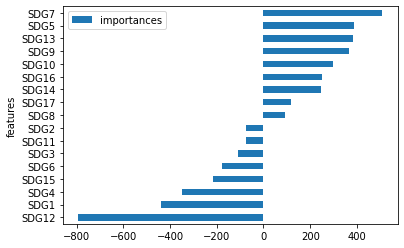

In [22]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = SDGs_Scores_2021.drop('Res_Nonhydro_Capita_2021',1)
y = SDGs_Scores_2021['Res_Nonhydro_Capita_2021']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = std_scale.transform(X_train)
X_test_scaled = std_scale.transform(X_test)

lm_scal = LinearRegression()
lm_scal.fit(X_train_scaled, y_train)

predictions = lm_scal.predict(X_test_scaled)

print('Score Train:', lm_scal.score(X_train_scaled, y_train))
print('MAE Train:', metrics.mean_absolute_error(y_train, lm_scal.predict(X_train_scaled)))
print("MAPE Train: ", metrics.mean_absolute_percentage_error(y_train,lm_scal.predict(X_train_scaled)))
print('MSE Train:', metrics.mean_squared_error(y_train, lm_scal.predict(X_train_scaled)))
print('RMSE Train:', np.sqrt(metrics.mean_squared_error(y_train, lm_scal.predict(X_train_scaled))))
print('RMSE / y.mean() Train:', np.sqrt(metrics.mean_squared_error(y_train, lm_scal.predict(X_train_scaled)))/y.mean())

print('-'*20)

print('Score Test:', lm_scal.score(X_test_scaled, y_test))
print('MAE Test:', metrics.mean_absolute_error(y_test, predictions))
print("MAPE Test: ", metrics.mean_absolute_percentage_error(y_test,predictions))
print('MSE Test:', metrics.mean_squared_error(y_test, predictions))
print('RMSE Test:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('RMSE / y.mean() Test:', np.sqrt(metrics.mean_squared_error(y_test, predictions))/y.mean())

print('-'*20)
print('Feature Importance')
importances = pd.DataFrame({'features':X.columns, 'importances':lm_scal.coef_}).sort_values('importances', ascending=False)
#Visualizamos
importances.set_index('features', inplace = True)
display(importances)
importances.sort_values("importances").plot.barh(y='importances');

